In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import sklearn

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split validation
from sklearn.linear_model import RidgeCV, LassoCV  # cross-validation

%matplotlib inline

In [2]:
# Organize and clean dataset
data = pd.read_csv("https://raw.githubusercontent.com/anthonyfoley1/Credit_Card/main/Credit2.csv")
contvars = ['Balance', 'Purchases', 'Oneoff Purchases',
            'Cash Advance', 'Purchases Freq.','Purchases Installments Freq.',
            'Cash Advance Freq.', 'Cash Advance TRX.', 'Purchases TRX.',
            'Credit Limit', 'Percent Full Payment', 'Tenure', 'Percent Balance']
mainVariables = ['Balance', 'Purchases', 'Oneoff Purchases',
       'Installment Purchases', 'Cash Advance', 'Purchases Freq.',
       'Oneoff Purchases Freq.', 'Purchases Installments Freq.',
       'Cash Advance Freq.', 'Cash Advance TRX.', 'Purchases TRX.',
       'Credit Limit', 'Payments', 'Min. Payments', 'Percent Full Payment',
       'Tenure', 'Default', 'Percent Balance']
data["Default"] = data.Default.astype(int)
data = data[mainVariables]
data = data.dropna()
z = StandardScaler()
data = sklearn.utils.shuffle(data)
data.describe()


,Balance,Purchases,Oneoff Purchases,Installment Purchases,Cash Advance,Purchases Freq.,Oneoff Purchases Freq.,Purchases Installments Freq.,Cash Advance Freq.,Cash Advance TRX.,Purchases TRX.,Credit Limit,Payments,Min. Payments,Percent Full Payment,Tenure,Default,Percent Balance
count,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000
mean,1591.197334,987.147555,575.004552,412.455039,984.169307,0.495786,0.205285,0.368525,0.136592,3.282462,14.838908,4504.654835,1743.475645,859.317638,0.159172,11.537166,0.274100,4.004738
std,2075.643877,1833.595181,1392.716759,865.425049,2047.402548,0.401243,0.299482,0.397935,0.198887,6.755345,24.196536,3630.137955,2676.016057,2361.179868,0.296161,1.306480,0.446085,136.469765
min,0.000199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000,0.000000,0.070000
25%,147.923961,43.212500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,417.866381,169.136987,0.000000,12.000000,0.000000,0.290000
50%,915.894909,375.235000,44.705000,94.485000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,894.619164,311.094616,0.000000,12.000000,0.000000,0.460000
75%,2089.860697,1141.232500,595.240000,482.675000,1129.702600,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1942.123927,819.114121,0.166667,12.000000,1.000000,1.357500
max,18495.558550,27957.680000,26514.320000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.000000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000,12049.870000


# Final Project

##### Anthony Foley

##### Erin Lee

##### Christian Muresan 

## 1) Which factors contribute the most to customers not being able to meet the minimum payments? Do you think these customers are repeat offenders, or are they outliers?

In [3]:
X = data[contvars]
y = data["Default"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

# Z-Score
zscore = StandardScaler()
zscore.fit(X_train)

Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

X_train[contvars].head()

# Logistic Regression

model = LogisticRegression(penalty = "none")

model.fit(Xz_train, y_train)
np.random.seed(3)
predictedVals = model.predict(X_test[contvars])

coef = pd.DataFrame({"Coefs": model.coef_[0], "Names": contvars})
coef = coef.append({"Coefs": model.intercept_[0], "Names":"intercept"}, ignore_index = True)
coef["Odds Coefs"] = np.exp(coef["Coefs"])

accuracy = accuracy_score(y_test,predictedVals)
print(accuracy)
coef

0.7828106852497096


,Coefs,Names,Odds Coefs
0,1.463451,Balance,4.320844
1,-0.701042,Purchases,0.496068
2,0.085554,Oneoff Purchases,1.089320
3,-0.322544,Cash Advance,0.724304
4,-0.209271,Purchases Freq.,0.811176
5,0.200947,Purchases Installments Freq.,1.222560
6,-0.293200,Cash Advance Freq.,0.745873
7,0.127866,Cash Advance TRX.,1.136401
8,-0.078507,Purchases TRX.,0.924496
9,-1.083844,Credit Limit,0.338293


### Balance, cash advance frequency, and purchase installments frequency are the three most influential factors when helping determine missed a minimum payment (AKA Default). A default implies that the customer paid less than originally obligated, therefore they defaulted or missed the payment, and fees and stricter policies would most likely ensue. These 3 variables each had coefficients (in odds) of XYZ, respectively. This means that a 1 unit increase in the standard deviation would increase the odds of the customer defaulting by XYZ. As you can see, balance’s coeff is the largest by a noticeable margin. This would make sense, as some customers who frequently overspend or have poor money management, could end up with larger balances and not be able to pay the minimum amount. However, it is worth noting that perhaps that this correlation does mean causation; higher balance accounts might just represent a significant amount of customers, so the model could misinterpret smaller accounts. Cash advance frequency and purchase installments frequency also are very important when predicting defaults. We expected these factors to have a relevant effect on defaults, as we know from real-world assumptions that customers who rely on cash advances and installment plans are susceptible to very high interest rates on the borrowed cash and can’t always afford items at their upfront costs. With that being said, customers who frequently use this feature are clearly not in a great financial position, so defaults on their payments would not be too surprising.


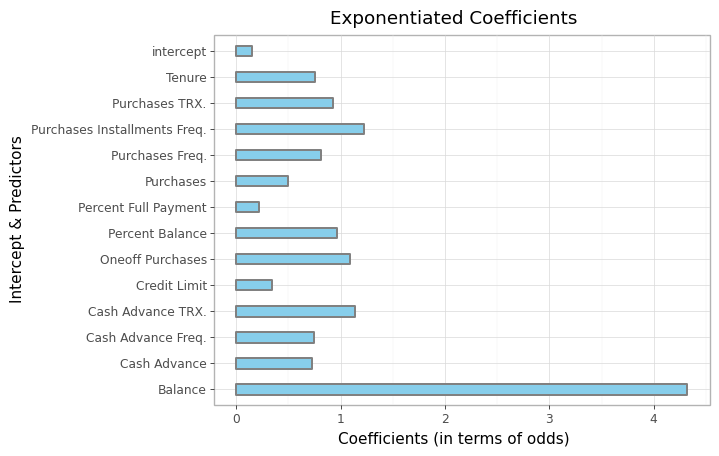

<ggplot: (8766507261163)>

In [4]:
(ggplot(coef, aes(x = "Names", y = "Odds Coefs")) + 
stat_summary(fun_data = "mean_sdl", geom = "bar", fill = "skyblue", color = "grey", width = 0.4, size = 0.8) + 
 xlab("Intercept & Predictors") + 
 ylab("Coefficients (in terms of odds)") + 
 coord_flip() + theme_light() + 
ggtitle("Exponentiated Coefficients"))

##### This first graph above displays the coefficients in terms of odds, as log-odds are difficult to interpret. We can see that cash advances, large balances, and installment plans are the 3 most important variables, as they influence the outcome the most (because of their large coefficient values).

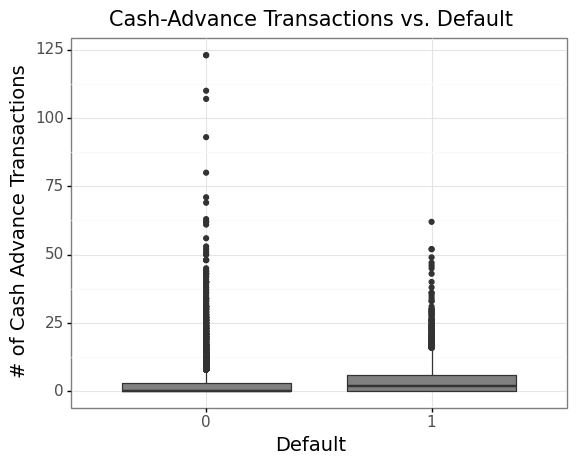

<ggplot: (8766507619753)>


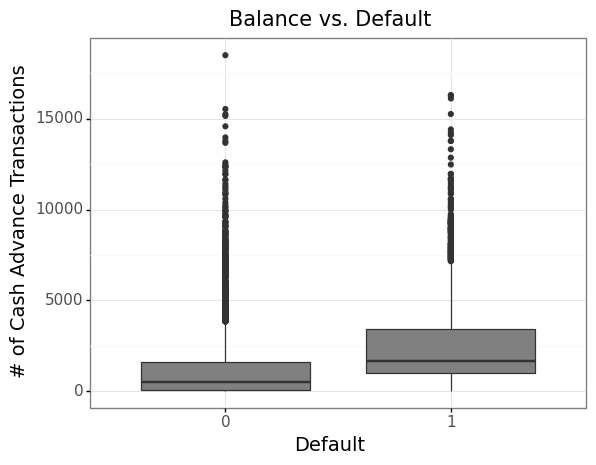

<ggplot: (8766507621864)>


In [5]:
print(ggplot(data, aes(x = "factor(Default)", y = "Cash Advance TRX.")) 
 + geom_boxplot(fill = "grey")  
 + ggtitle("Cash-Advance Transactions vs. Default") 
 + labs(x = "Default", y = "# of Cash Advance Transactions")
 + theme_bw()
 + theme(
     axis_text_x = element_text(size = 11),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 15),
     axis_title_x = element_text(size = 14),
     axis_title_y = element_text(size = 14),
         )
)
print(ggplot(data, aes(x = "factor(Default)", y = "Balance")) 
 + geom_boxplot(fill = "grey")  
 + ggtitle("Balance vs. Default") 
 + labs(x = "Default", y = "# of Cash Advance Transactions")
 + theme_bw()
 + theme(
     axis_text_x = element_text(size = 11),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 15),
     axis_title_x = element_text(size = 14),
     axis_title_y = element_text(size = 14),
         )
)

##### This graph above shows the statistical significance of cash advances transactions by factoring them into a default group and a non-default group. Although the differences are small, we can tell that the average and 75% percentile for transactions are lower in the non-default section (0). The box slightly shifts upward in the default box, which implies that the default customers, on average, have more cash advances.

# 2) Do people who make frequent purchases or have a low percent of their full balance paid off also tend to miss their minimum payment (default)? 

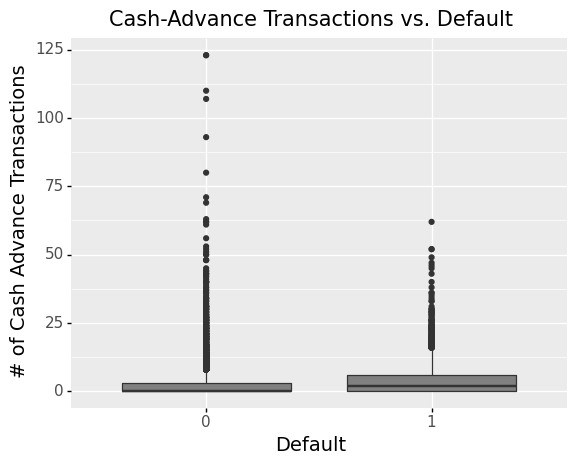

<ggplot: (8766507368548)>

In [6]:
(ggplot(data, aes(x = "factor(Default)", y = "Cash Advance TRX.")) 
 + geom_boxplot(fill = "grey")  
 + ggtitle("Cash-Advance Transactions vs. Default") 
 + labs(x = "Default", y = "# of Cash Advance Transactions")
 + theme(
     axis_text_x = element_text(size = 11),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 15),
     axis_title_x = element_text(size = 14),
     axis_title_y = element_text(size = 14),
         )

)

##### There are 2 themes in these graphs that are obvious:

##### (1) People who have not made a significant contribution to paying down their balance are more likely to default. This makes sense, because customers would probably be more willing to ignore a single payment if they haven’t made any current contributions because less is “at stake.” People who have consistently made their monthly payments have a lot to lose by defaulting in the form of a decrease in credit score and other unnecessary fees.

##### (2) People who make frequent purchases more often are to less likely to default on their payments. This is initially counter intuitive, since one would expect customers who frequently make purchases to be less financially responsible (higher risk at defaulting), however the opposite appears to be true. 


## 3) Is there a distinct group of users who frequently use a cash advance and purchase installments frequently?

In [7]:
features3 = ["Balance", "Purchases", "Credit Limit", "Payments", "Cash Advance TRX.", "Min. Payments", "Oneoff Purchases","Purchases Installments Freq.","Installment Purchases","Cash Advance Freq."]

# z-score BOTH x & y variables
X3 = data[features3]

# keep as a dataframe
X3[features3] = z.fit_transform(X3)

hac = AgglomerativeClustering(n_clusters = 3, 
                             affinity = "euclidean", 
                             linkage = "ward")

# fit the data
hac.fit(X3[features3])

membership = hac.labels_
membership

silhouette_score(X3[features3], membership)

0.4639332065103473

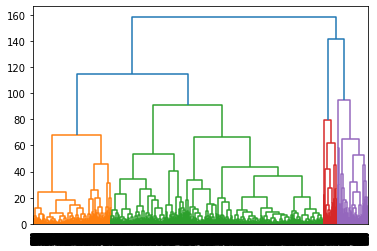

In [8]:
dendro = sch.dendrogram(sch.linkage(X3[features3], method = "ward", metric = "euclidean"))

##### The dendrogram allows us to make two determinations: what are the patterns in the data (since we do not know in advance)? What are the optimal number of clusters? The color-coding of the clusters on the dendrogram allows us to see which cluster maximizes the vertical distance. The best number of clusters seems to be three with all the green data points in one cluster, all the red data points in another cluster, and all the blue data points in a third cluster. The y-axis represents how similar things are or the distance between them. A larger vertical distance, or the height of the dendrogram, means less similarity of the data point to the cluster it was merged with. Larger distances essentially mean there is a high degree of separation. 

##### In our dendrogram, there is high density at the bottom. Meanwhile, it is relatively non-dense at the top. This means that the three clusters achieve good separation. The fact that there is lots of density at the bottom allows us to infer the clusters are very cohesive. We grabbed the labels from our model (with the hac.labels_ invocation) while also inputting that we put all the data in three clusters (as specified above). The result of this is what the cluster assignment would be according to the HAC algorithm. Our silhouette score for the three clusters was 42. We would prefer a higher number as a score of 42 means these clusters are not as cohesive or separate as we might like in order to determine a distinct subgroup in our data. To look at the actual individual clusters and what these clusters are characterized by, we will use a few scatterplots.

##### Each of the 3 clusters have their own strengths and weaknesses in terms of variables, which may help us draw conclusion to the type of credit user is in each group:

##### Cluster 0 (red) showed low values for cash advance frequency, credit limit, one-off purchases, payments, except for purchase installment frequency, which was both low and high
-	We might assume that this group of borrowers are financially responsible and less impulsive than the other groups, since they had low scores in cash advances and one-off purchases

##### Cluster 1 (green) had mid-range values for cash advance frequency and credit limit, and low-range values for one-off purchases, payments, and purchase installments
-	We might assume that this group of borrowers likes to spend a lot of money and have been approved for higher credit limits by the bank. Although they may spend a lot of money, it is not wasted on frivolous and expensive items (one-off purchases), rather they simply have a comfortable standard of living. These characteristics are pretty consistent with the members of the middle class, which is likely the classification for this group.

##### Cluster 2 (blue) had high values for purchase installment frequency, mid-range values for credit limit and one-off purchases, and low-range values for payments and cash advance frequency.
-	We might assume that this group of borrowers is not financially responsible and are not great with their money management skills. They tend to have high purchase installments (financing a purchase over time), while meeting low minimum payments with a moderate credit limit. We can conclude that this group of borrowers may simply be irresponsible money managers

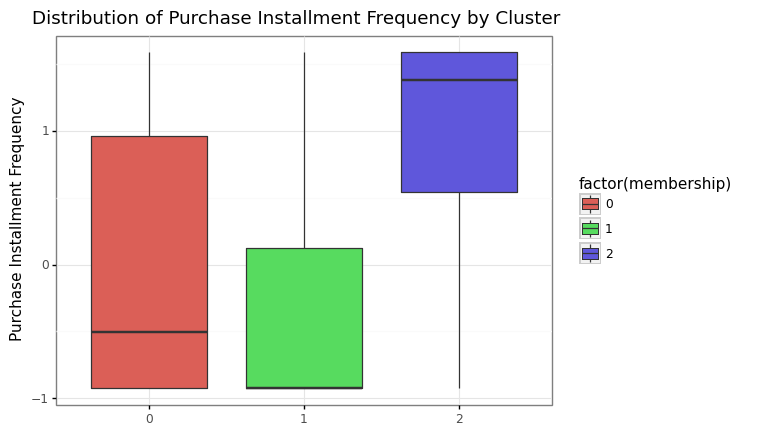

<ggplot: (8766401877327)>


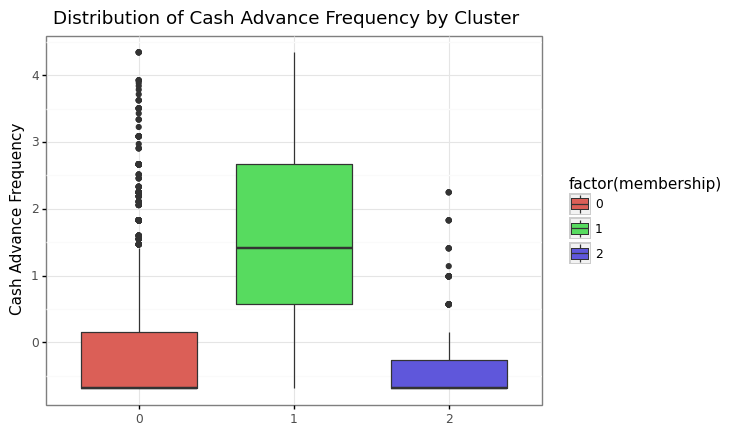

<ggplot: (8766401860482)>


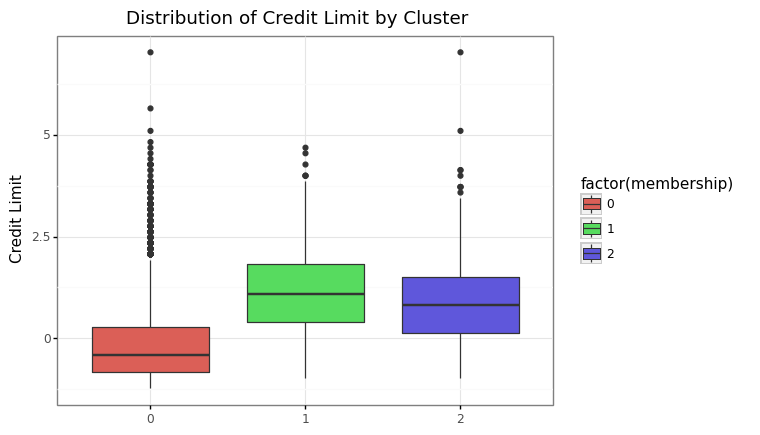

<ggplot: (8766402271985)>


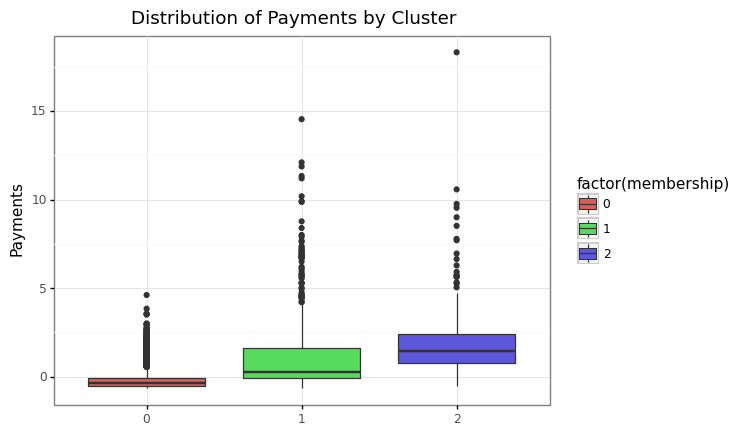

<ggplot: (8766401875697)>


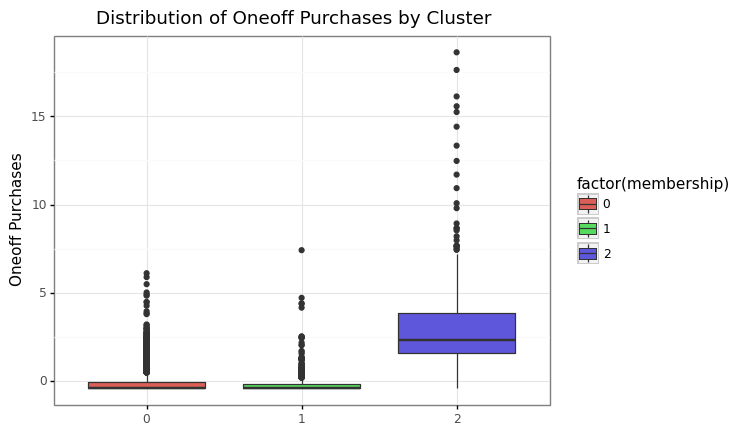

<ggplot: (8766402859433)>


In [9]:
print((ggplot(X3, aes(x = "factor(membership)", y = "Purchases Installments Freq.")) + 
       geom_boxplot(aes(fill = "factor(membership)"))+
       labs(y = "Purchase Installment Frequency", x= "", title = "Distribution of Purchase Installment Frequency by Cluster")+
        theme(panel_grid_major_x = element_blank(),
              panel_grid_minor_x = element_blank(),
              panel_grid_minor_y = element_blank(),
              axis_text_x = element_text(size = 12),
              axis_text_y = element_text(size = 12),
              axis_title_y = element_blank(),
              plot_title = element_text(size = 15))+
      theme_bw()))
print((ggplot(X3, aes(x = "factor(membership)", y = "Cash Advance Freq.")) + 
       geom_boxplot(aes(fill = "factor(membership)"))+
       labs(y = "Cash Advance Frequency", x= "", title = "Distribution of Cash Advance Frequency by Cluster")+
        theme(panel_grid_major_x = element_blank(),
              panel_grid_minor_x = element_blank(),
              panel_grid_minor_y = element_blank(),
              axis_text_x = element_text(size = 12),
              axis_text_y = element_text(size = 12),
              axis_title_y = element_blank(),
              plot_title = element_text(size = 15))+
      theme_bw()))


print((ggplot(X3, aes(x = "factor(membership)", y = "Credit Limit")) + 
       geom_boxplot(aes(fill = "factor(membership)"))+
       labs(y = "Credit Limit", x= "", title = "Distribution of Credit Limit by Cluster")+
        theme(panel_grid_major_x = element_blank(),
              panel_grid_minor_x = element_blank(),
              panel_grid_minor_y = element_blank(),
              axis_text_x = element_text(size = 12),
              axis_text_y = element_text(size = 12),
              axis_title_y = element_blank(),
              plot_title = element_text(size = 15))+
      theme_bw()))
print((ggplot(X3, aes(x = "factor(membership)", y = "Payments")) + 
       geom_boxplot(aes(fill = "factor(membership)"))+
       labs(y = "Payments", x= "", title = "Distribution of Payments by Cluster")+
        theme(panel_grid_major_x = element_blank(),
              panel_grid_minor_x = element_blank(),
              panel_grid_minor_y = element_blank(),
              axis_text_x = element_text(size = 12),
              axis_text_y = element_text(size = 12),
              axis_title_y = element_blank(),
              plot_title = element_text(size = 15))+
      theme_bw()))
print((ggplot(X3, aes(x = "factor(membership)", y = "Oneoff Purchases")) + 
       geom_boxplot(aes(fill = "factor(membership)"))+
       labs(y = "Oneoff Purchases", x= "", title = "Distribution of Oneoff Purchases by Cluster")+
        theme(panel_grid_major_x = element_blank(),
              panel_grid_minor_x = element_blank(),
              panel_grid_minor_y = element_blank(),
              axis_text_x = element_text(size = 12),
              axis_text_y = element_text(size = 12),
              axis_title_y = element_blank(),
              plot_title = element_text(size = 15))+
      theme_bw()))


# 4) Do people with a higher tenure tend to have higher credit limits? If so, why might this relationship exist? 

In [136]:
features4 = ['Balance', 'Purchases', 'Oneoff Purchases',
       'Installment Purchases', 'Cash Advance', 'Purchases Freq.',
       'Oneoff Purchases Freq.', 'Purchases Installments Freq.',
       'Cash Advance Freq.', 'Cash Advance TRX.', 'Purchases TRX.',
       'Payments', 'Min. Payments', 'Percent Full Payment',
       'Tenure', 'Default', 'Percent Balance']

predictors4 = data[features4]
X4 = predictors4
y4 = data["Credit Limit"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

# X_train4 = z.fit_transform(X_train4)
# X_test4 = z.fit_transform(X_test4)

np.random.seed(16)
model4 = LinearRegression()
model4.fit(X_train4,y_train4)
np.random.seed(16)

print("Train R2 is: ",round(model4.score(X_train4,y_train4),4))
print("Test R2 is: ",round(model4.score(X_test4,y_test4),4))

coef4 = pd.DataFrame({"Coefs": model4.coef_, "Names": features4})
coef4 = coef4.append({"Coefs": model4.intercept_, "Names":"intercept"}, ignore_index = True)
round(coef4,4)


Train R2 is:  0.4624
Test R2 is:  0.4541


,Coefs,Names
0,1.0154,Balance
1,-0.3321,Purchases
2,0.5450,Oneoff Purchases
3,0.7990,Installment Purchases
4,0.2172,Cash Advance
5,-1009.2931,Purchases Freq.
6,2565.4427,Oneoff Purchases Freq.
7,772.7121,Purchases Installments Freq.
8,-1768.1915,Cash Advance Freq.
9,-23.4782,Cash Advance TRX.


#### People with higher tenure will most likely have a higher credit limit. Our linear model, which takes in input variables to predict the output variable (Credit limit), gave tenure a coefficient of 202.35. This essentially means that for every positive 1 unit increase in the standard deviation of a customer's tenure, their credit limit will increase by $202.35.

#### This extra amount of credit available is noticeable, and would have a meaningful influence. For example, a customer of 10 years would have an additional credit limit of $607.05 more than a customer of 7 years, all else equal. Credit limits are strategically increased throughout a customers life, to reward good spending habits and allow for more interest to be made on the banks end.

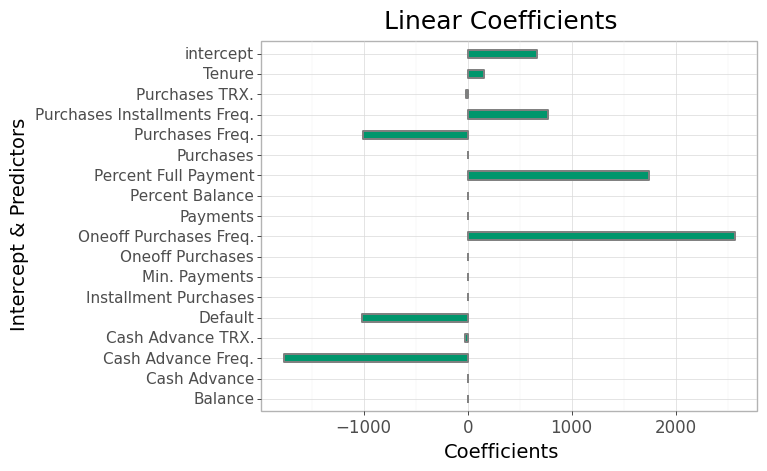

<ggplot: (8766405659778)>

In [137]:
(ggplot(coef4, aes(x = "Names", y = "Coefs")) + 
stat_summary(fun_data = "mean_sdl", geom = "bar", fill = "#00966C", color = "grey", width = 0.4, size = 0.8) + 
 xlab("Intercept & Predictors") + 
 ylab("Coefficients") + 
 coord_flip() + theme_light() + 
ggtitle("Linear Coefficients") + theme (
    axis_text_x = element_text(size = 12),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 18),
     axis_title_x = element_text(size = 14),
     axis_title_y = element_text(size = 14),
)
)

##### This graph above shows the coefficients from our linear regression model. As you can see, values left of the center are negative, and have a negative correlation with our output variable(credit limit), and values to the right have a positive correlation with the output variable. One-Off purchases and cash advances are the 2 most influential variables in the model, as we have seen previously.

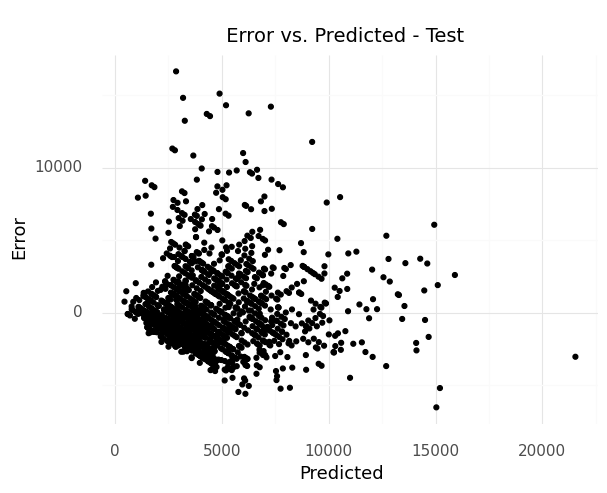

<ggplot: (8766402479604)>

In [138]:
predictedVals4 = model4.predict(X_test4)

residuals4 = pd.DataFrame({"Error" : y_test4 - predictedVals4, "Predicted" : predictedVals4})

(ggplot(residuals4, aes(x = "Predicted", y = "Error")) + geom_point() + theme_minimal() + ggtitle("\n Error vs. Predicted - Test") +
theme(
     axis_text_x = element_text(size = 11),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 14),
     axis_title_x = element_text(size = 13),
     axis_title_y = element_text(size = 13),
         ))


##### The graph above shows the residuals versus the error; this scatterplot allows us to determine whether a linear model was the best choice for analyzing our question of interest. We also wanted to see a graph of the the three assumptions of linearity since we did not know in advance the relationship between our predictor variables with the outcome. A linear model works best for the data when the expected trend is a straight line, or plane.

##### From this graph of the residuals, we can evaluate if the data is suited to a linear model. The first assumption we were operating under was that of homoscedasticity. Specifically, we are interested in whether the error was spread out evenly throughout the model. In this graph, it looks that the answer is no. The spread of the error is consistent at the beginning of this model. For values larger than 5000, the error spreads out significantly. We can say that the assumption of homoscedasticity for a linear model has been violated. The consequence of this might be that our predicted value for higher credit limits might be way off. Since our question of interest was to analyze if people with a higher tenure also have a higher credit limit, this means our predictive model is way off and fails to answer our research question. The second assumption we check for is if most of the errors are normally distributed. Since most of the errors are close to zero as well as there being fewer and fewer as we get further from zero, we can roughly conclude that this is true. It should be noted that since we do not have homoscedasticity, we can only roughly speculate. Lastly, we were assuming that there was a linear relationship between the predictor variables and our outcome. In our scatterplot of the residuals versus the error, the data does not appear to follow any discernible pattern. There is not much data for higher predicted values of credit limit, so it is hard to make any true determinations about the linearity. However, we are specifically on the look out for a clear blob of points that does not seem to have any pattern. Our data fits this description, and therefore passes two out of the three assumptions that a linear regression model suits this data.

# 5) Are people who frequently make one-off purchases likely to also have a higher balance on their credit card?

In [139]:
features5 = ['Credit Limit', 'Purchases', 'Oneoff Purchases',
       'Installment Purchases', 'Cash Advance', 'Purchases Freq.',
       'Oneoff Purchases Freq.', 'Purchases Installments Freq.',
       'Cash Advance Freq.', 'Cash Advance TRX.', 'Purchases TRX.',
       'Payments', 'Min. Payments', 'Percent Full Payment',
       'Tenure', 'Default', 'Percent Balance']

predictors5 = data[features5]
X5 = predictors5
y5 = data["Balance"]

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2)

X_train5 = z.fit_transform(X_train5)
X_test5 = z.fit_transform(X_test5)

np.random.seed(16)
model5 = LinearRegression()
model5.fit(X_train5,y_train5)
np.random.seed(16)

print("Train R2 is: ",round(model5.score(X_train5,y_train5),4))
print("Test R2 is: ",round(model5.score(X_test5,y_test5),4))

coef5 = pd.DataFrame({"Coefs": model5.coef_, "Names": features5})
coef5 = coef5.append({"Coefs": model5.intercept_, "Names":"intercept"}, ignore_index = True)
round(coef5,4)

Train R2 is:  0.6205
Test R2 is:  0.6287


,Coefs,Names
0,832.0324,Credit Limit
1,3293.9145,Purchases
2,-2362.1429,Oneoff Purchases
3,-1513.4539,Installment Purchases
4,453.9831,Cash Advance
5,-22.9378,Purchases Freq.
6,-44.0956,Oneoff Purchases Freq.
7,55.9135,Purchases Installments Freq.
8,504.4134,Cash Advance Freq.
9,-154.3735,Cash Advance TRX.


#### According to the model's results, customers who frequently use one-off purchases do not have higher balances. These customers are high spenders, as one-off purchases can include very expensive goods like a TV or new car rims. We originally thought their balances would be higher as a result, however, the model proves us wrong and shows that these frequent, high-spenders do not have larger balances. One possible explanation to this is that these large purchases are paid off immediately, to avoid any interest fees. The dataset represents a few months, so the balance column most likely represents their revolving balance, so wealthier clients would probably have much lower outstanding amount owed to the bank. With a pretty good R2 score on both train and test data, we feel that the negative correlation between oneoff purchases and balance can hold true.¶

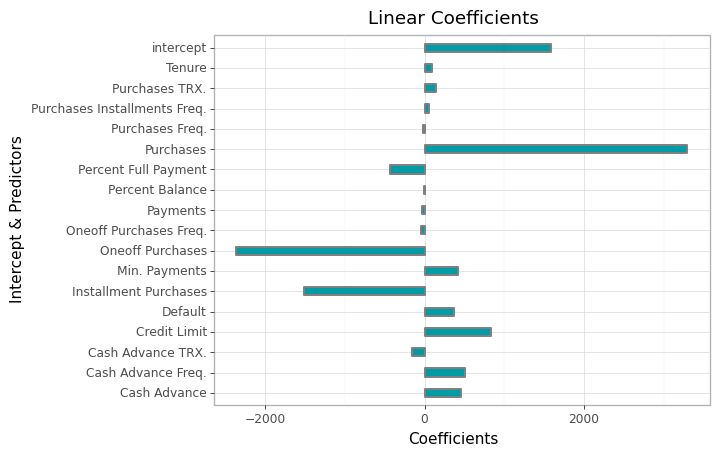

<ggplot: (8766407245650)>

In [140]:
(ggplot(coef5, aes(x = "Names", y = "Coefs")) + 
stat_summary(fun_data = "mean_sdl", geom = "bar", fill = "#009CA6", color = "grey", width = 0.4, size = 0.8) + 
 xlab("Intercept & Predictors") + 
 ylab("Coefficients") + 
 coord_flip() + theme_light() + 
ggtitle("Linear Coefficients"))

##### Here we see which variables are the most important, as purchases and one-off are the most important, as their coefficient values are the highest in value.

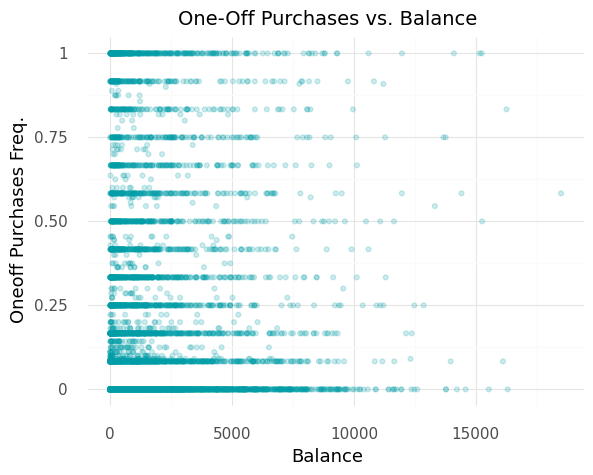

<ggplot: (8766402275503)>

In [141]:
(ggplot(data, aes(x = "Balance", y = "Oneoff Purchases Freq.")) + 
 geom_point(alpha = 1/5, color = "#009CA6") +  
 theme_minimal() + 
ggtitle("One-Off Purchases vs. Balance")
+theme(
     axis_text_x = element_text(size = 11),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 14),
     axis_title_x = element_text(size = 13),
     axis_title_y = element_text(size = 13),
         ))

##### This graph shows the correlation between balance and one-off purchases. Although there is not an obvious, distinct difference between lower and higher frequencies, you can tell that balances in the upper range tend to stay on the lower end.

## 6) Are customers with a longer tenure more likely to meet their minimum payments?

In [142]:
features6 = ["Credit Limit","Balance", "Purchases", "Cash Advance", "Installment Purchases","Cash Advance TRX.","Purchases TRX.","Tenure"]

predictors6 = data[contvars]
X6 = predictors6
y6 = data["Default"]

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2)

X_train6 = z.fit_transform(X_train6)
X_test6 = z.fit_transform(X_test6)

np.random.seed(2)
model6 = LogisticRegression(penalty = "none")

model6.fit(X_train6, y_train6)


coef6 = pd.DataFrame({"Log-Odds Coefficients": model6.coef_[0], "Variable Name": contvars})
coef6 = coef6.append({"Log-Odds Coefficients": model6.intercept_[0], "Variable Name":"intercept"}, ignore_index = True)

coef6["Odds Coefficients"] = np.exp(coef6["Log-Odds Coefficients"])
round(coef6,2)


,Log-Odds Coefficients,Variable Name,Odds Coefficients
0,1.49,Balance,4.42
1,-0.65,Purchases,0.52
2,0.02,Oneoff Purchases,1.02
3,-0.28,Cash Advance,0.76
4,-0.14,Purchases Freq.,0.87
5,0.13,Purchases Installments Freq.,1.13
6,-0.32,Cash Advance Freq.,0.72
7,0.14,Cash Advance TRX.,1.15
8,-0.06,Purchases TRX.,0.94
9,-1.09,Credit Limit,0.34


### It appears that the longer tenure customers at this bank do not have an advantage over their younger counterparts when it comes to financial stability. Tenure’s coefficient (in odds) of 0.74, shows that even a 1 unit increase in standard deviation will increase the odds of them missing a payment by 0.74. If you view the graph below, we have displayed several other variables with similar coefficients. You can see that tenure, along with cash advance frequency and installments frequency all hold very similar values, which shows us that defaults are actually more likely to occur with time. In fact, almost 88% of the defaults come from customers with tenures greater than 10 years. In conclusion, customers with longer tenure are more likely to miss or default on payments, perhaps due bills accumulating or other expenses that become more prevelant with age (medical issues or children's tuition etc.)

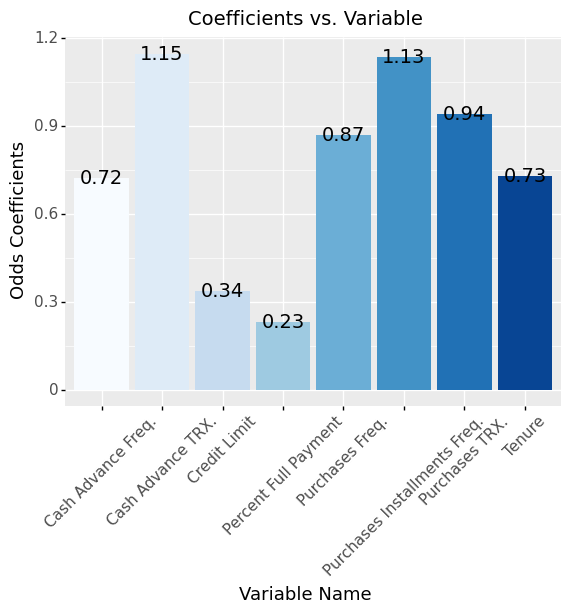

<ggplot: (8766404757264)>

In [143]:
coef6["Rounded"] = round(coef6["Odds Coefficients"],2)

(ggplot(coef6[4:12], aes(x ="Variable Name", y = "Odds Coefficients", fill = "Variable Name",))+
geom_bar(stat = "identity" )+ ggtitle("Coefficients vs. Variable") + theme(axis_text_x = element_text(angle = 45)) 
+ scale_fill_brewer(palette="Blues") + theme(legend_position = "none") + geom_text(aes(label="Rounded"),size=14) 
+  theme(
     axis_text_x = element_text(size = 11),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 14),
     axis_title_x = element_text(size = 13),
     axis_title_y = element_text(size = 13),
         ))

##### This graph above shows the variables used in the comparison against Tenure and their corresponding coefficients from our logistic model; this logistic model predicts the odds of a default. We can clearly see that purchase installment frequency and cash advance frequency are among the more impactful variables, compared to percent full payment and credit limit.

0.7904


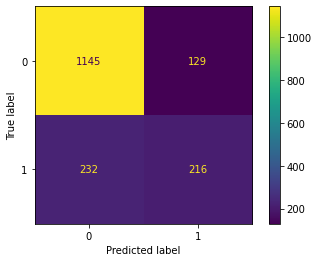

In [144]:
predictValues6 = model6.predict(X_test6)

accuracy6 = accuracy_score(y_test6,predictValues6)
accuracy6 = round(accuracy6,4)
print(accuracy6)
confusion_matrix(y_test6,predictValues6)

plot_confusion_matrix(model6,X_test6,y_test6)


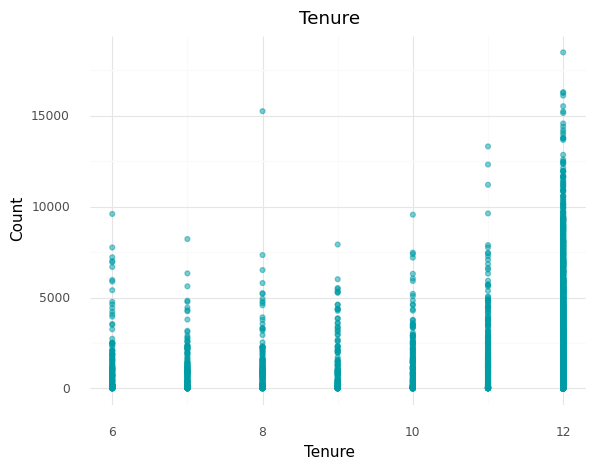

<ggplot: (8766405661799)>

In [145]:
count = data.iloc[:, 0]

(ggplot(data, aes(x = "Tenure", y = "count")) + 
 labs(x = "Tenure", y = "Count") + 
 ggtitle("Tenure") + 
 theme_minimal() + 
 geom_point(alpha = 1/2, color = "#009CA6"))

##### This graph helps visually demonstrate that most of the defaults come from higher tenure customers. We can clearly see (from left to right) that the count of defaults steadily increases with tenure.

## 7) What credit limits would you recommend to the new customers based on their prior credit card statements?

#### Customer 1: Avg. Balance:  $3000, Minimum Payment: $1800, Cash Advance TRX 10, Number of Transactions: 40, Min. Payment % of Balance: 60%

#### Customer 2: Avg. Balance:  $2700, Minimum Payment: $815, Cash Advance TRX 0, Number of Transactions: 22, Min. Payment % of Balance: 20%

### For customer 1, we would recommend a credit limit of $2,112.93

### For customer 2, we would recommend a credit limit of $2,365.52

### When viewing these customers data, we can deduce that customer 1 has the worse spending habits on his/her credit card. They love to use cash advance and have a high minimum payment relative to their total balance. We concluded earlier that both of these factors play a prominant role in missed payments, therefore the customer might be riskier. When using sumproduct to multiply the data to its corresponding coefficient, we got the 2 credit limit outputs listed above. Cash advances transactions have a strong, negative correlation to credit limit. With customer 1, they were penalized for using these transactions, and subsequently would be recommended a lower credit limit relative to customer 2, due to their more riskier habits.

In [146]:
Name = ["Customer 1", "Customer 2"]
Limit = [2112.93, 2365.52]

toDF = {"Name": Name, "Credit Limit": Limit}

DF = pd.DataFrame(toDF)

DF.head()

,Name,Credit Limit
0,Customer 1,2112.93
1,Customer 2,2365.52


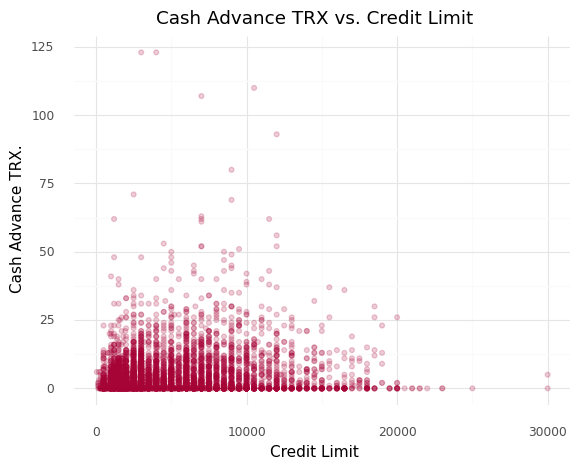

<ggplot: (8766406883256)>

In [147]:
(ggplot(data, aes(x = "Credit Limit", y = "Cash Advance TRX.")) + 
 geom_point(alpha = 1/5, color = "#A50034") +  
 theme_minimal() + 
ggtitle("Cash Advance TRX vs. Credit Limit"))

##### A major difference between customer 1 and customer 2 is their cash advance transactions. In the graph above, you can see that customers with very high credit limits tend to not frequently use cash advances because of how expensive the loan terms are. Therefore, it makes sense that customer 1, who has the more frequent use of cash advance, should be recommended a lower credit limit.

# 8) The size of the dataset is quite large in terms of rows, but small in terms of number of features. Is there a noticeable amount of computational efficiency saved after applying dimensionality reduction?

### Here we recall the exact model from question #4 .

In [148]:
coef4

,Coefs,Names
0,1.015410,Balance
1,-0.332108,Purchases
2,0.545027,Oneoff Purchases
3,0.798992,Installment Purchases
4,0.217203,Cash Advance
5,-1009.293112,Purchases Freq.
6,2565.442703,Oneoff Purchases Freq.
7,772.712117,Purchases Installments Freq.
8,-1768.191546,Cash Advance Freq.
9,-23.478228,Cash Advance TRX.


In [149]:
lr = LinearRegression()

lr.fit(X_train4,y_train4)

lr_mae_train = mean_absolute_error(y_train4, lr.predict(X_train4))
lr_mae_test = mean_absolute_error(y_test4, lr.predict(X_test4))

print("TRAIN: ", mean_absolute_error(y_train4, lr.predict(X_train4)))
print("TEST : ", mean_absolute_error(y_test4, lr.predict(X_test4)))

TRAIN:  1930.9463780585115
TEST :  1958.8322776052328


### Applying Lasso.

In [150]:
lsr = Lasso()

lsr.fit(X_train4,y_train4)

lasso_mae_train = mean_absolute_error(y_train4, lsr.predict(X_train4))
lasso_mae_test = mean_absolute_error(y_test4, lsr.predict(X_test4))

print("TRAIN: ", mean_absolute_error(y_train4, lsr.predict(X_train4)))
print("TEST : ", mean_absolute_error(y_test4, lsr.predict(X_test4)))

TRAIN:  1931.3474783579577
TEST :  1959.1092800623478


### Tuning Lasso.

In [151]:
lsr_tune = LassoCV(cv = 5).fit(X_train4,y_train4)
# lsr_tune = LassoCV(cv = 5, alphas = [0.001,0.01,0.05,1]).fit(X_train,y_train)

print("TRAIN: ", mean_absolute_error(y_train4, lsr_tune.predict(X_train4)))
print("TEST : ", mean_absolute_error(y_test4, lsr_tune.predict(X_test4)))

print("\nWe chose " + str(lsr_tune.alpha_) + " as our alpha.")

TRAIN:  2105.7651960359303
TEST :  2152.637846121394

We chose 50293.025530362735 as our alpha.


In [152]:
print("Train R2 is: ",round(lsr_tune.score(X_train4,y_train4),4))
print("Test R2 is: ",round(lsr_tune.score(X_test4,y_test4),4))

coef8 = pd.DataFrame({"Coefs": lsr_tune.coef_, "Variables": features4})
coef8 = coef8.append({"Coefs": lsr_tune.intercept_, "Variables":"intercept"}, ignore_index = True)
coef8

Train R2 is:  0.3913
Test R2 is:  0.3835


,Coefs,Variables
0,0.817626,Balance
1,0.396332,Purchases
2,0.000000,Oneoff Purchases
3,0.000000,Installment Purchases
4,0.024762,Cash Advance
5,0.000000,Purchases Freq.
6,0.000000,Oneoff Purchases Freq.
7,0.000000,Purchases Installments Freq.
8,-0.000000,Cash Advance Freq.
9,-0.000000,Cash Advance TRX.


### If we had to pick the top three most important variables to the model as determined by lasso in descending order of importance, these would be: Balance, Purchases, and Payments. We know this because the coefficients with the highest magnitude will be the last to be shrunk to zero. We apply regularization because we were looking to minimize any extreme values of the coefficients that a variable might take on. These variables are the last to converge to zero after applying the lasso penalty function because the values of these coeffients are what the model determined gave the minimum error in predicting the outcome variable. We tuned our lasso model so as to determine the optimal value of alpha, the tuning parameter for the model.

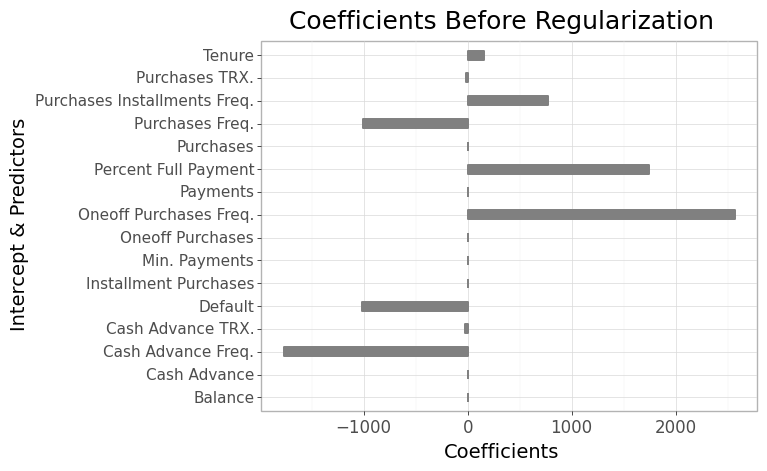

<ggplot: (8766401826148)>

In [153]:
(ggplot(coef4[:16], aes(x = "Names", y = "Coefs")) + 
stat_summary(fun_data = "mean_sdl", geom = "bar", fill = "grey", color = "grey", width = 0.4, size = 0.8) + 
 xlab("Intercept & Predictors") + 
 ylab("Coefficients") + 
 coord_flip() + theme_light() + 
ggtitle("Coefficients Before Regularization") + theme (
    axis_text_x = element_text(size = 12),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 18),
     axis_title_x = element_text(size = 14),
     axis_title_y = element_text(size = 14),
)
)

##### This graph show the coefficients of the variables BEFORE applying regularization to the simple linear regression model from Question #4. At a glance, the coefficients of the highest magnitude at this point are Oneoff Purchases Frequency, Cash Advance Frequency, and Percent Full Payment. Other things to notice about this graph is how it shows that there are quite a few variables that have small values coefficients near zero.

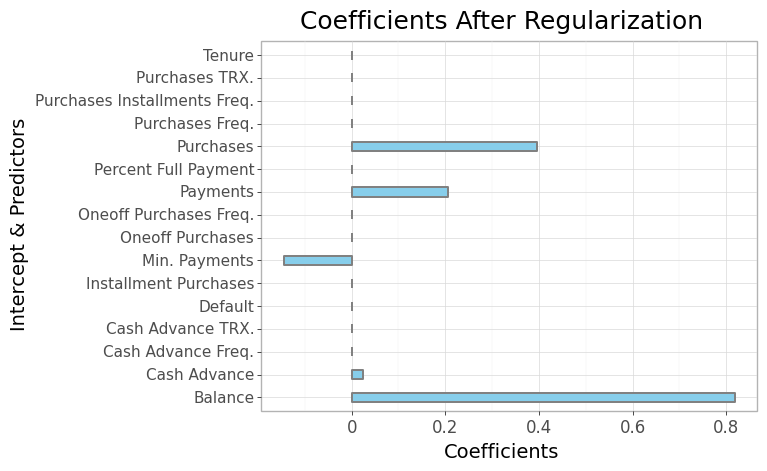

<ggplot: (8766402524654)>

In [154]:
(ggplot(coef8[:16], aes(x = "Variables", y = "Coefs")) + 
stat_summary(fun_data = "mean_sdl", geom = "bar", fill = "skyblue", color = "grey", width = 0.4, size = 0.8) + 
 xlab("Intercept & Predictors") + 
 ylab("Coefficients") + 
 coord_flip() + theme_light() + 
ggtitle("Coefficients After Regularization") + theme (
    axis_text_x = element_text(size = 12),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 18),
     axis_title_x = element_text(size = 14),
     axis_title_y = element_text(size = 14),
)
)

##### This graph shows the linear coefficients AFTER having applying regularization. The lasso model shrunk all the small coefficients exactly to zero. We can also observe that some of the variables with the coefficients of highest magnitudes include Balance, Purchases, and Payments -- a noticeably different result as compared to our linear model pre-regularization.

##### While we expected a significant amount of computational efficiency to be saved, only a moderate amount was actually saved. In our normal regression models, we would have to wait longer, whereas in lasso, the computational time was noticeably lower as a result of dimensionality reduction.

# 9) Using the results from the last question, how many components should ideally be used according to the lasso model? How was this number determined?

In [155]:
coef8_DF = coef8.iloc[0:13]
coef8_DF

,Coefs,Variables
0,0.817626,Balance
1,0.396332,Purchases
2,0.000000,Oneoff Purchases
3,0.000000,Installment Purchases
4,0.024762,Cash Advance
5,0.000000,Purchases Freq.
6,0.000000,Oneoff Purchases Freq.
7,0.000000,Purchases Installments Freq.
8,-0.000000,Cash Advance Freq.
9,-0.000000,Cash Advance TRX.


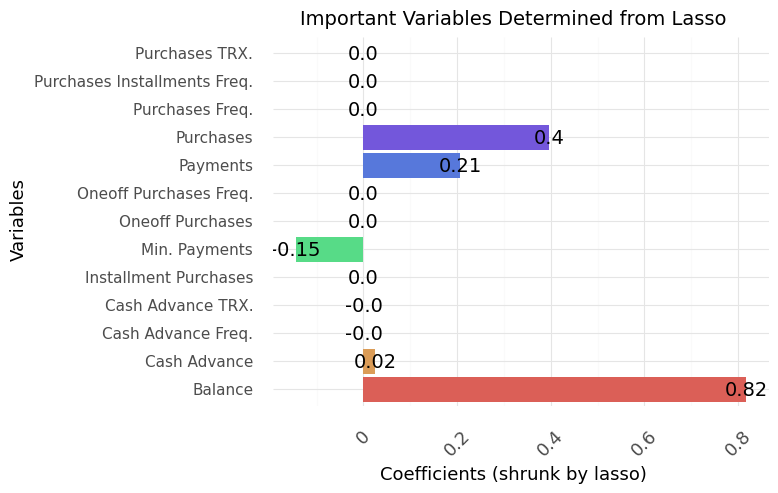

<ggplot: (8766507260938)>

In [156]:
coef8_DF["Rounded"] = round(coef8_DF["Coefs"],2)

(ggplot(coef8_DF, aes(x ="Variables", y = "Coefs", fill = "Variables"))+
geom_bar(stat = "identity", width = 0.9)+ ggtitle("Important Variables Determined from Lasso") 
 + theme_minimal() 
 + coord_flip() + 
 ylab("Coefficients (shrunk by lasso)") + 
 geom_text(aes(label="Rounded"),size=14)  
+ theme(
     axis_text_x = element_text(size = 13, angle = 45),
     axis_text_y = element_text(size = 11),
     plot_title = element_text(size = 14),
     axis_title_x = element_text(size = 13),
     axis_title_y = element_text(size = 13), 
    legend_position = "none"
         ))

##### From the graph above, we can see there were only six variables that were preserved after using the lasso model. These were: Balance, Purchases, Installment Purchases, Cash Advance, Payments, and Min Payments. This means that these were the only variables that were not shrunk entirely to zero as a result of the penalty function being applied by lasso. We do not expect that all of the variables will be important in predicting our outcome. Regularization, a form of dimensionality reduction, allows to optimize model complexity.